# Hot Hand Updated Dataset


In [3]:
## Load necessary libraries
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.cross_validation import KFold
import StringIO
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Read in data
shot_logs_full = pd.read_csv('datasets/Augmented_Dataset.csv')
shot_logs_full.columns = map(str.lower, shot_logs_full.columns)

# Preview data
print 'Number of variables:', np.shape(shot_logs_full)[1]
print 'Variable names:', shot_logs_full.columns.values
print 'Number of observations/shots:', np.shape(shot_logs_full)[0]
shot_logs_full.head()

Number of variables: 24
Variable names: ['unnamed: 0' 'game_id' 'matchup' 'location' 'w' 'final_margin'
 'shot_number' 'period' 'game_clock' 'shot_clock' 'dribbles' 'touch_time'
 'shot_dist' 'pts_type' 'shot_result' 'closest_defender'
 'closest_defender_player_id' 'close_def_dist' 'fgm' 'pts' 'player_name'
 'player_id' 'fg_percent' 'current_streak']
Number of observations/shots: 118033


,unnamed: 0,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,...,shot_result,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id,fg_percent,current_streak
0,28621,21400054,"NOV 04, 2014 - NOP vs. CHA",H,W,9,1,1,2:29,22.1,...,made,"Roberts, Brian",203148,4.4,1,3,ryan anderson,201583,0.407407,1
1,28622,21400054,"NOV 04, 2014 - NOP vs. CHA",H,W,9,2,2,11:19,5.8,...,made,"Zeller, Cody",203469,6.1,1,2,ryan anderson,201583,0.407407,2
2,28623,21400054,"NOV 04, 2014 - NOP vs. CHA",H,W,9,3,2,10:51,10.2,...,missed,"Maxiell, Jason",101131,5.7,0,0,ryan anderson,201583,0.407407,-1
3,28624,21400054,"NOV 04, 2014 - NOP vs. CHA",H,W,9,4,2,8:21,24.0,...,made,"Zeller, Cody",203469,2.6,1,2,ryan anderson,201583,0.407407,1
4,28625,21400054,"NOV 04, 2014 - NOP vs. CHA",H,W,9,5,2,7:59,16.0,...,missed,"Zeller, Cody",203469,6.5,0,0,ryan anderson,201583,0.407407,-1


In [5]:
#create column names
columns = ['std']
columns2 = ['shots']
columns3 = ['score']

#create dataframes to fill
index = shot_logs_full.player_name.unique()
d = pd.DataFrame(index=index, columns=columns)
d2 = pd.DataFrame(index=index, columns=columns2)
print d

                          std
ryan anderson             NaN
chandler parsons          NaN
kirk hinrich              NaN
kentavious caldwell-pope  NaN
kevin love                NaN
john wall                 NaN
kyle korver               NaN
enes kanter               NaN
danny green               NaN
carmelo anthony           NaN
carlos boozer             NaN
stephen curry             NaN
zach randolph             NaN
nick collison             NaN
luc mbah a moute          NaN
jamal crawford            NaN
joakim noah               NaN
mnta ellis                NaN
rasual butler             NaN
luis scola                NaN
manu ginobili             NaN
rodney stuckey            NaN
eric bledsoe              NaN
arron afflalo             NaN
damjan rudez              NaN
cj miles                  NaN
jonas valanciunas         NaN
harrison barnes           NaN
cole aldrich              NaN
jared sullinger           NaN
...                       ...
leandro barbosa           NaN
brook lope

In [6]:
#get standard deviation of shot distance for each player
for i in shot_logs_full.player_name.unique():
    
    df = shot_logs_full[(shot_logs_full.player_name==i)]
    std = df['shot_dist'].std()

    d.set_value(i, 'std', std)
    
print d

                              std
ryan anderson             9.77712
chandler parsons           9.2691
kirk hinrich              7.14817
kentavious caldwell-pope  8.78201
kevin love                9.19338
john wall                 8.25484
kyle korver                5.3433
enes kanter                7.6715
danny green               8.59863
carmelo anthony           8.21407
carlos boozer             5.99205
stephen curry             9.26037
zach randolph             6.76672
nick collison             9.33285
luc mbah a moute          9.43966
jamal crawford             7.4995
joakim noah               7.03438
mnta ellis                8.26314
rasual butler             7.46405
luis scola                7.61052
manu ginobili             9.52537
rodney stuckey            7.70039
eric bledsoe              9.54971
arron afflalo             7.40032
damjan rudez              7.40378
cj miles                  8.22976
jonas valanciunas         4.21869
harrison barnes           8.93967
cole aldrich  

In [26]:
#get average number of shots per game for each player
for i in shot_logs_full.player_name.unique():
    
    df = shot_logs_full[(shot_logs_full.player_name==i)]
    gamesunique = df.game_id.unique()
    games = len(gamesunique)
    #only use players who have played in at least 35 games
    if games < 35:
        shotspg = 0
    else:
        shotspg = (float(df.shape[0])/float(games))

    d2.set_value(i, 'shots', shotspg)
    
print d2['shots']



ryan anderson               12.7059
chandler parsons            12.4815
kirk hinrich                      0
kentavious caldwell-pope    11.5593
kevin love                  13.0508
john wall                   14.3279
kyle korver                 8.39286
enes kanter                 11.9245
danny green                 9.71429
carmelo anthony             20.3077
carlos boozer               10.6897
stephen curry               16.9298
zach randolph                 13.42
nick collison                     0
luc mbah a moute                9.7
jamal crawford              13.3833
joakim noah                 8.10811
mnta ellis                  17.2295
rasual butler               8.45652
luis scola                  8.41509
manu ginobili               10.1739
rodney stuckey              10.4902
eric bledsoe                12.8333
arron afflalo               12.4444
damjan rudez                      0
cj miles                    11.9783
jonas valanciunas           8.54545
harrison barnes             

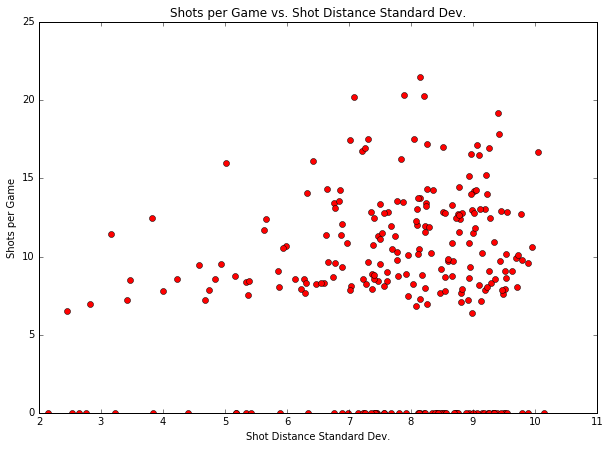

In [29]:
plt.figure(figsize=(10,7))
plt.plot(d['std'].values, d2.values, 'o', c='red')
plt.title('Shots per Game vs. Shot Distance Standard Dev.')
plt.xlabel('Shot Distance Standard Dev.')
plt.ylabel('Shots per Game')

In [8]:
d['shots'] = pd.Series(d2['shots'], index=index)

from sklearn import preprocessing

#scale the values
x = d.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, index = index)

print df_scaled

                                 0         1
ryan anderson             0.953945  0.591889
chandler parsons          0.890421  0.581435
kirk hinrich              0.625217  0.000000
kentavious caldwell-pope  0.829514  0.538478
kevin love                0.880953  0.607959
john wall                 0.763597  0.667447
kyle korver               0.399532  0.390972
enes kanter               0.690654  0.555490
danny green               0.806584  0.452529
carmelo anthony           0.758499  0.946011
carlos boozer             0.480653  0.497965
stephen curry             0.889329  0.788656
zach randolph             0.577519  0.625155
nick collison             0.898393  0.000000
luc mbah a moute          0.911749  0.451863
jamal crawford            0.669147  0.623447
joakim noah               0.610988  0.377707
mnta ellis                0.764634  0.802617
rasual butler             0.664715  0.393937
luis scola                0.683030  0.392008
manu ginobili             0.922465  0.473940
rodney stu

C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
index = shot_logs_full.player_name.unique()
df_score = pd.DataFrame(index=index, columns=columns3)

#calculate score for each player by adding the two columns together.
for index, row in df_scaled.iterrows():
    score = row.iloc[0] + row.iloc[1]
    df_score.set_value(index, 'score', score)


#sort by score
df_score = df_score.sort_values('score', ascending = False)

print df_score

                       score
lebron james         1.79978
damian lillard       1.76668
russell westbrook    1.74949
james harden         1.74102
carmelo anthony      1.70451
stephen curry        1.67799
kobe bryant          1.66612
derrick rose          1.6625
kyrie irving         1.63913
kemba walker         1.62315
tyreke evans          1.5936
klay thompson        1.58903
mnta ellis           1.56725
lamarcus aldridge     1.5583
kyle lowry           1.55536
blake griffin        1.55364
ryan anderson        1.54583
victor oladipo       1.53729
brandon knight       1.52814
eric bledsoe         1.52333
jimmy butler         1.52071
wilson chandler      1.51676
brandon jennings     1.50455
gordon hayward       1.50184
kevin love           1.48891
jared sullinger      1.47846
chandler parsons     1.47186
evan fournier        1.47148
rudy gay             1.46933
demarcus cousins     1.46117
...                      ...
steve blake         0.659524
damjan rudez        0.657178
jonas valanciu

In [10]:
print df_score.index

Index([u'lebron james', u'damian lillard', u'russell westbrook',
       u'james harden', u'carmelo anthony', u'stephen curry', u'kobe bryant',
       u'derrick rose', u'kyrie irving', u'kemba walker',
       ...
       u'jusuf nurkic', u'alexis ajinca', u'omer asik', u'kosta koufos',
       u'andrew bogut', u'steve adams', u'john henson', u'cole aldrich',
       u'dwight howard', u'rudy gobert'],
      dtype='object', length=259)


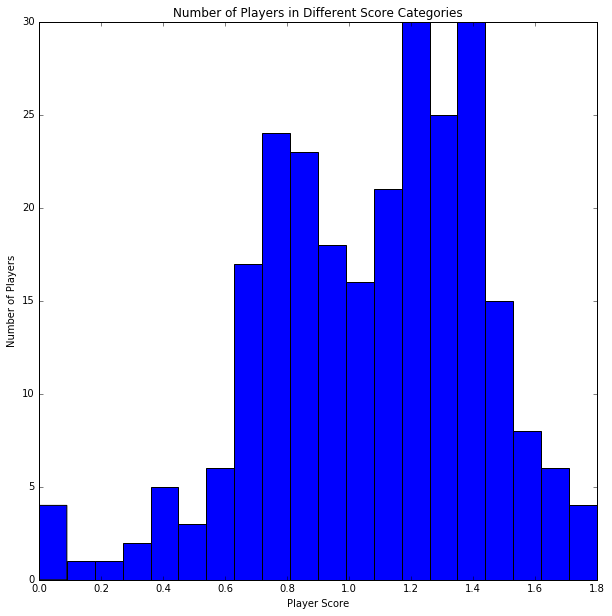

In [15]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.hist(df_score.values, bins = 20)
ax1.set_title('Number of Players in Different Score Categories')
ax1.set_ylabel('Number of Players')
ax1.set_xlabel('Player Score')
plt.show()

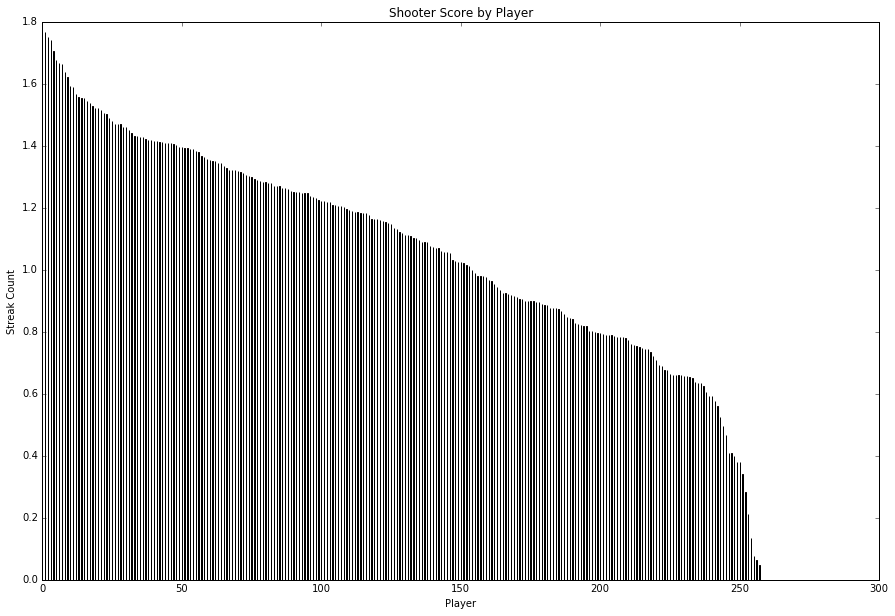

In [14]:
# plot a bar graph of number of streaks
ind = np.arange(259)  # the x locations for the groups
width = 0.1       # the width of the bars

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
rects1 = ax.bar(ind, df_score.values, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Streak Count')
ax.set_xlabel('Player')
ax.set_title('Shooter Score by Player')



In [14]:
## Export df_score
df_score.to_csv(path_or_buf='datasets/df_score.csv')